In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# **MAIN PATH CONFIGURATION**

In [ ]:
main_path='/content/drive/MyDrive/Animals'

# **Accessing each folder**

In [ ]:
foldernames = os.listdir(main_path)

## **We try to find out how many folders we have inside Animal folder. Inside Animal folder, each folder describe individual category we have in our dataset. After printing the foldernames, we can see that we have 5 different folders which indicate 5 different categories.**

In [ ]:
print(foldernames)

['Jaguar', 'Leopard', 'Lion', 'Tiger', 'Cheetah']


## **Now we want to access each folder individually.So what we did, we just join the main path till Animal folder and than we add individual foldernames.By joining this, we can access each individual foldernames path.Here foldernames[0] indicates 'Jaguar' folder.And after printing the individual path we can see that, we accessed the Jaguar folder.**


In [ ]:
individualpath_for_jaguar=os.path.join(main_path,foldernames[0])
print(individualpath_for_jaguar)

/content/drive/MyDrive/Animals/Jaguar


# **Now i want to access each image in Jaguar folder. So i will iterate through Jaguar folder or we can say directory and try to fetch the name of each image.**

In [ ]:
for img_name in os.listdir(individualpath_for_jaguar):
  print(img_name)

jaguar-1337201__340.jpg
animal-2607__340.jpg
animal-world-3193850__340.jpg
jaguar-859412__340.jpg
jaguar-halbwuchsig-sepia-profile-41002.jpeg
pexels-photo-4468189.jpeg
pexels-photo-4468189 (1).jpeg
pexels-photo-155164.jpeg
jaguar-2188660__340.jpg
jaguar-1727406__340.jpg
africa-animals-zoo-tiger.jpg
pexels-photo-773004.jpeg
pexels-photo-5899760.jpeg
photo-1552845301-7ff61cbb2865.jpg
photo-1584313453147-be9beeb8504f.jpg
photo-1469367498026-54a83d222f12.jpg
photo-1584307228520-94ee423187ed.jpg
photo-1584313452299-86bbb3f16eca.jpg
pexels-photo-8562894.jpeg
photo-1477949775154-d739b82400b3.jpg
photo-1528238344097-a8994f7c74e4.jpg
photo-1614371611363-bbce32167c6c.jpg
photo-1541893321-dcc3e4dcb6dc.jpg
pexels-photo-7124473.jpeg
photo-1601544359642-c76c4f7c3221.jpg
photo-1577053711673-cdf8e87a38e5.jpg
photo-1477949775154-d739b82400b3 (1).jpg
photo-1604994956847-2b0ab169366b.jpg
photo-1534759846116-5799c33ce22a.jpg
photo-1486173789830-3a5236a03ab1.jpg


## **After fetching the image name we then join it with individualpath, which gives us the actual path of an individual image.Because i am currently dealing with only Jaguar folder.So what i did, i just fetched all the names of images and stored it in imgname_jaguar.**

In [ ]:
imgname_jaguar=os.listdir(individualpath_for_jaguar)

In [ ]:
each_img_path_jaguar=os.path.join(individualpath_for_jaguar,imgname_jaguar[0])
print(each_img_path_jaguar)

/content/drive/MyDrive/Animals/Jaguar/jaguar-1337201__340.jpg


## **Now i successfully find the path of an actual image which located in Jaguar directory.Now i want to see the actual image.First i will try to see it in numpy array than i will try to see it in actual format.**

In [ ]:
read_img=cv2.imread(each_img_path_jaguar)
print(read_img)

[[[216 229 231]
  [230 245 248]
  [224 241 250]
  ...
  [  0  20  28]
  [  0  21  27]
  [  9  31  37]]

 [[215 228 230]
  [214 229 232]
  [208 225 234]
  ...
  [  0  13  21]
  [  0  14  20]
  [  0  22  28]]

 [[201 216 218]
  [202 219 222]
  [210 229 236]
  ...
  [  0  15  23]
  [  0  18  25]
  [  6  25  32]]

 ...

 [[ 12  36  48]
  [  5  29  41]
  [ 16  35  48]
  ...
  [ 68 112 129]
  [ 79 122 139]
  [ 96 139 156]]

 [[ 13  37  49]
  [  7  31  43]
  [ 18  37  50]
  ...
  [100 144 161]
  [ 73 116 133]
  [ 79 122 139]]

 [[ 16  40  52]
  [ 10  34  46]
  [ 21  40  53]
  ...
  [ 80 124 141]
  [ 95 138 155]
  [ 86 129 146]]]


# **Now try to see the shape of this image.**

In [ ]:
print(read_img.shape)

(340, 504, 3)


# **We succesfully fetch a single RGB image for Jaguar directory.**

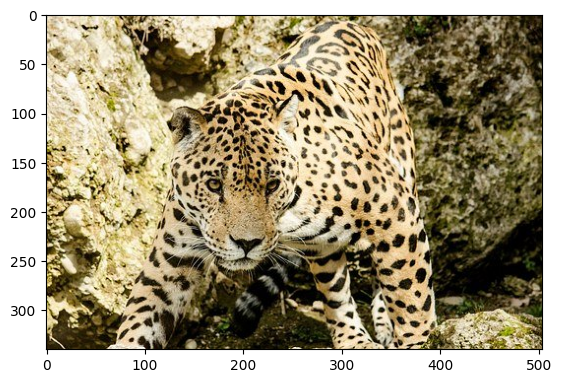

In [ ]:
rgb_img=cv2.cvtColor(read_img,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(rgb_img)
plt.show()

# **Now we will do it for all the images present in Jaguar directory.**

In [ ]:
for img in os.listdir(individualpath_for_jaguar):
  each_img_path_for_jaguar=os.path.join(individualpath_for_jaguar,img)
  read_img_jaguar=cv2.imread(each_img_path_for_jaguar)
  rgb_img_jaguar=cv2.cvtColor(read_img_jaguar,cv2.COLOR_BGR2RGB)
  plt.imshow(rgb_img_jaguar)
  plt.show()


# **Now we will fetch the exact thing with all the directories we have in Animals folders.And also we will resize all the images we have.All images should have same size.**

In [ ]:
for folder in foldernames:
    individualpath = os.path.join(main_path, folder)
    imgnames = os.listdir(individualpath)

    for img in imgnames:
        each_img_path = os.path.join(individualpath, img)
        read_img = cv2.imread(each_img_path)

        if read_img is not None:
            rgb_img = cv2.cvtColor(read_img, cv2.COLOR_BGR2RGB)
            resize_img = cv2.resize(rgb_img, (300, 300))
            plt.imshow(resize_img)
            plt.show()


# **So, we are ready to store all the images. But before we do ,we need to convert the RGB images to GRAY images.And after converting it, we need to store it as a training dataset. And in training dataset we have two things,one is the gray images and another part is it's label.**

In [ ]:
for folder in foldernames:
    individualpath = os.path.join(main_path, folder)
    imgnames = os.listdir(individualpath)
    label=foldernames.index(folder)
    print(folder,label)

Jaguar 0
Leopard 1
Lion 2
Tiger 3
Cheetah 4


In [ ]:
X_train=[]
for folder in foldernames:
    individualpath = os.path.join(main_path, folder)
    imgnames = os.listdir(individualpath)
    label=foldernames.index(folder)
    for img in imgnames:
        each_img_path = os.path.join(individualpath, img)
        read_img = cv2.imread(each_img_path)
        if read_img is not None:
            rgb_img = cv2.cvtColor(read_img, cv2.COLOR_BGR2RGB)
            resize_img = cv2.resize(rgb_img, (300, 300))
            gray_img=cv2.cvtColor(resize_img,cv2.COLOR_RGB2GRAY)
            X_train.append([gray_img,label])
            plt.imshow(gray_img,cmap='gray')
            plt.xlabel(folder)
            plt.show()

# **Finally we stored all the images in our X_train list.But in machine learning, if we train this dataset ,we might not get better result. Because, each class is stored in a pattern. So machine learning model might get this pattern. So, we need to shuffle this dataset to break this pattern.**

In [ ]:
import random
random.shuffle(X_train)

In [ ]:
print(len(X_train))

170


In [ ]:
plt.figure(figsize=(20,30))
for i in range(48):
  plt.subplot(8,6,i+1)
  plt.imshow(X_train[i][0],cmap='gray')
  plt.xlabel(foldernames[X_train[i][1]])
plt.show()


# **For KNN ,we will use L2 distance,5-fold cross validation. For this project we will use only validation set for measuring accuracy.We have 170 images. So we will divide our dataset into five fold and where four fold we will use as a training dataset and one fold we will use for validation set.**

# **When we find all the combination for a single validate image,we need to sort the list for this particular validate image.**

In [ ]:
def comparator(dis):
  return dis[2]

In [ ]:
def euclidian_distance(training_img,validate_img):
  return np.sqrt(np.sum((training_img-validate_img)**2))

# **This function will help to find out the distance between a validation image with other training image for each fold.**

In [ ]:
def distance(training_data,validate_data):
  list_dis=[]
  for validate_img in validate_data:
    val_label_train_label_distance=[]
    for training_img in training_data:
      l2_distance=euclidian_distance(training_img[0],validate_img[0])
      val_label_train_label_distance.append([training_img[1],validate_img[1],l2_distance])

    val_label_train_label_distance.sort(key=comparator)
    first_thirty_data=val_label_train_label_distance[:]
    list_dis.append(val_label_train_label_distance)
  return list_dis



# **We split our dataset with five fold. And than we try to find out distances for each fold. where in each fold we have train data and validate data.**

In [ ]:
fold1 = X_train[:34]
fold2 = X_train[34:68]
fold3 = X_train[68:102]
fold4 = X_train[102:136]
fold5 = X_train[136:]

# **After spliting the dataset, now we need to use 5-fold cross validation.In each fold, four parts will be training images, and the rest of the single part will be used for validation.**

In [ ]:
first_train = fold1 + fold2 + fold3 + fold4
first_validate=fold5
second_train=fold1+fold2+fold3+fold5
second_validate=fold4
third_train=fold1+fold2+fold4+fold5
third_validate=fold3
fourth_train=fold1+fold3+fold4+fold5
fourth_validate=fold2
fifth_train=fold2+fold3+fold4+fold5
fifth_validate=fold1

# **Now we try to find out the distances for each fold. Here list_dis_one indicates ,for fold1 we find out euclidian distance for each validate image.And each validate image presents in first_validate dataset. 34 validate images are presents in each validate dataset for each fold.**

In [ ]:
list_dis_one=distance(first_train,first_validate)
print(type(list_dis_one))

<class 'list'>


In [ ]:
print(len(list_dis_one))

34


# **Each list has 136 columns.**

In [ ]:
print(len(list_dis_one[0]))

136


In [ ]:
all_dis=[]

# **For each fold , i find out euclidian distances.**

In [ ]:
list_dis_two=distance(second_train,second_validate)
list_dis_three=distance(third_train,third_validate)
list_dis_four=distance(fourth_train,fourth_validate)
list_dis_five=distance(fifth_train,fifth_validate)
all_dis.append(list_dis_one)
all_dis.append(list_dis_two)
all_dis.append(list_dis_three)
all_dis.append(list_dis_four)
all_dis.append(list_dis_five)

In [ ]:
print(len(all_dis))

5


# **So, calculate_accuracy function will calculate the accuray where it will take two parameters ,one is the distances for each fold, and value of k. We try to find out how many images are present when validation label and training label are same. And we will do this for every k and the range of k is 1 to 30.so lets say when k=5, we will find out find first five neighbors(we already sorted every list which is present in list_dis_one).where validation label are same for each neighbors.Because in each list in list_dis_one, we have 34 row and 136 column.So we will traverse each row and fetch first k values and try to find out how many correct predictions are there.So, after this we might get 34 maximum correct prediction or less.So,if we want to find out accuracy we just need to divide the correct prediction with 34 which is basically the total_validation_images.And we use here majority voting.If majority training labels  are similar to current validation label then we can say our KNN predict the correct images.Actually KNN works fine in this case**

In [ ]:
def calculate_accuracy(list_dis_one, k_values):
    total_validation_images = len(list_dis_one)
    accuracies = []

    for k in k_values:
        correct_predictions = 0

        for validation_neighbors in list_dis_one:
            top_k_neighbors = validation_neighbors[:k]
            validation_label = top_k_neighbors[0][1]

            training_labels = [neighbor[0] for neighbor in top_k_neighbors]

            majority_label = max(set(training_labels), key=training_labels.count)

            if majority_label == validation_label:
                correct_predictions += 1

        accuracy = correct_predictions / total_validation_images
        accuracies.append(accuracy)

    return accuracies




# **Here we use a list for k, where for each fold we try to find the accuracies where k are 1 to 30.**

In [ ]:
k_values = list(range(1, 31, 1))
all_accuracies = []

for fold_dis in all_dis:
    fold_accuracy = calculate_accuracy(fold_dis, k_values)
    all_accuracies.append(fold_accuracy)


# **Because we use 5-fold ,so obviously we have five row where each row contain accuracy for k=1 to k=30 in each row.**

In [ ]:
print(len(all_accuracies))

5


# **After we try to plot all the accuracies for each specific k.And here for each k we obviously have five folds points.For k=1 ,we try to find out accuracy in each fold and so on.Here my data structure looks like , we have 5 rows and in each row we have 1 to 30 accuracies. Now we want to find find out average accuracy for k=1 for five folds. So, zip built in function will help me to find accuracies for k=1 in each fold.And this rule will apply for each row.I will iterate in each row and i will combine accuracies for each k and find out the average value.**

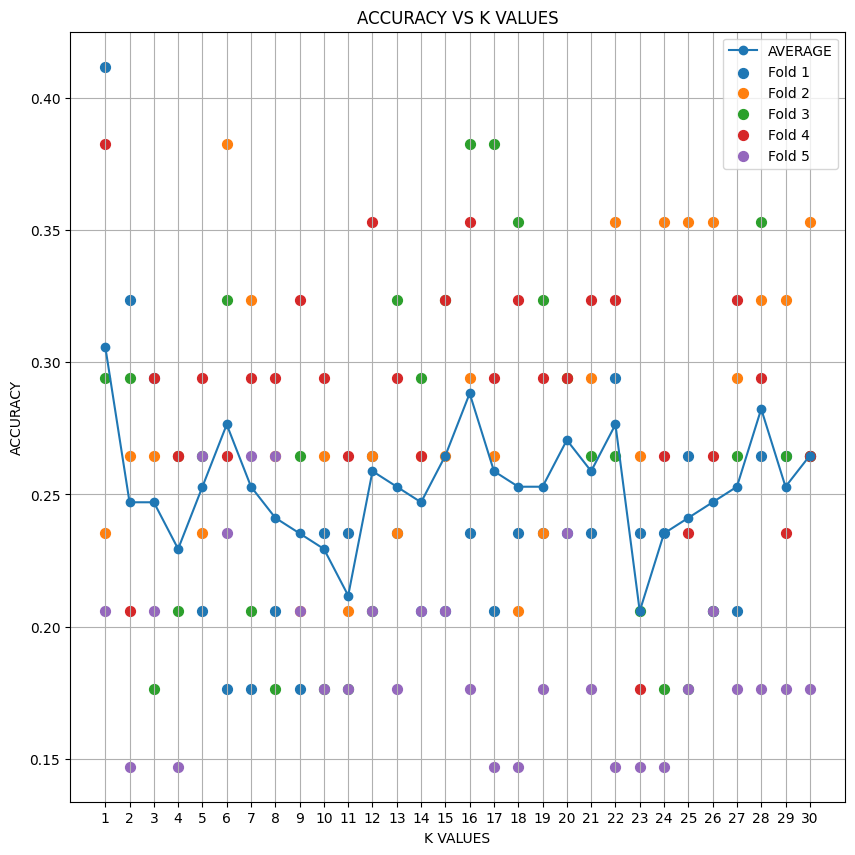

In [ ]:

import matplotlib.pyplot as plt

k_values = list(range(1, 31, 1))

mean_accuracies = [sum(accuracies) / len(all_accuracies) for accuracies in zip(*all_accuracies)]

plt.figure(figsize=(10, 10))
plt.plot(k_values, mean_accuracies, marker='o', label='AVERAGE')
for i, fold_accuracies in enumerate(all_accuracies):
    plt.scatter(k_values, fold_accuracies, label=f'Fold {i+1}', marker='o', s=50)

plt.xlabel('K VALUES')
plt.ylabel('ACCURACY')
plt.title('ACCURACY VS K VALUES')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()